## Дерево решений и случайный лес

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Для начала нам нужно определить оптимальную глубину дерева. Нам важны результаты по тестовой выборке, поэтому выбираем max_leaf_nodes=2.

In [18]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

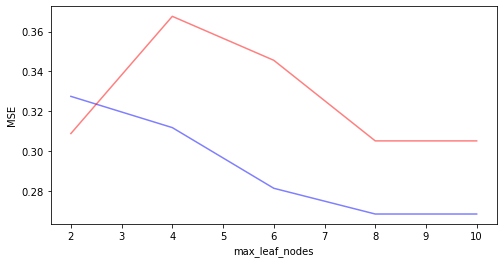

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

Строим соответствующее дерево. Видим, что его качество близко к методу k-ближайших соседей.

In [20]:
ct = DecisionTreeClassifier(max_leaf_nodes = 2, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [21]:
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.6911764705882353

Посмотрим на матрицу сопряженности. Видим, что модель 188 объектов распознала верно и 84 нет. Точность модели: 69,1%. Доля ошибок: 30,9%.

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[114  32]
 [ 52  74]]


Для построения случайного леса необходимо определиться с оптимальным количеством деревьев. ВОзьмём его равным 2.

In [23]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

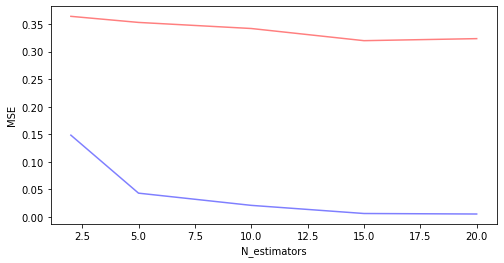

In [24]:
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

Теперь определим глубину дерева (как мы это делали с деревом решений). Оптимальная глубина = 6.

In [25]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=2, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

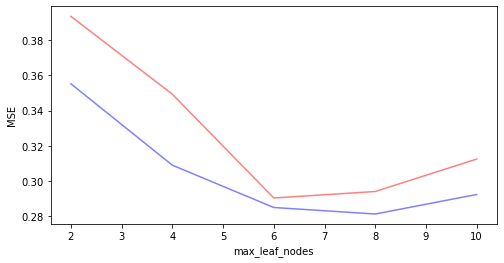

In [26]:
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

Строим модель с полученными параметрами. Получили хороший результат, который можно сказать, что аналогичен дерево решений.

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2, max_leaf_nodes = 6, random_state = 10).fit(X_train, y_train)

In [28]:
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test)

0.7095588235294118

Посмотрим на матрицу сопряженности. Видим, что модель 193 объектов распознала верно и 79 нет. Точность модели: 70,9%. Доля ошибок: 29,1%.

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[97 49]
 [30 96]]


## Наилучшим классификатором пока является метод k-ближайших соседей.  Да, модель случайного леса почти такая же по качеству, но она гораздо сложнее, поэтому я не вижу смысла отдавать предпочтение именно ей. Стоит отметить, что дерево решений  плохо распознаёт низкодоходные университеты.